In [283]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm

In [305]:
data = pd.read_csv('../Dataset/SA01/F01_SA01_R01_fin.csv',)
df = pd.DataFrame(data)
df = df.iloc[:,:3]
df = df.dropna(axis = 0)
df.columns = ["x축 가속도", "y축 가속도", "z축 가속도"]
df

,x축 가속도,y축 가속도,z축 가속도
0,-1,-270,-22
1,1,-277,-24
2,2,-281,-25
3,11,-290,-24
4,12,-296,-29
...,...,...,...
2394,-119,71,-246
2395,-120,73,-242
2396,-117,68,-245
2397,-119,69,-248


In [306]:
x_acc = df[["x축 가속도"]]
y_acc = df[["y축 가속도"]]
z_acc = df[["z축 가속도"]]

x_square = x_acc * x_acc
y_square = y_acc * y_acc
z_square = z_acc * z_acc

df = pd.concat([x_square, y_square, z_square], axis=1)
df["sum"] = df.sum(1)
df["sqrt_sum"]= np.sqrt(df["sum"])

In [335]:
df["Mean"] = df["sqrt_sum"].rolling(window=50).mean()
df["Steddev"] = df["sqrt_sum"].rolling(window=50).std()
df["Upper"] = df["Mean"] + 2.5*df["Steddev"]
df["Lower"] = df["Mean"] - 2.5*df["Steddev"]

df = df[49:]

up = (df["Upper"] < df['Mean']).value_counts()
down = (df["Lower"] > df['Mean']).value_counts()
print(up, down)

False    2095
dtype: int64 False    2095
dtype: int64


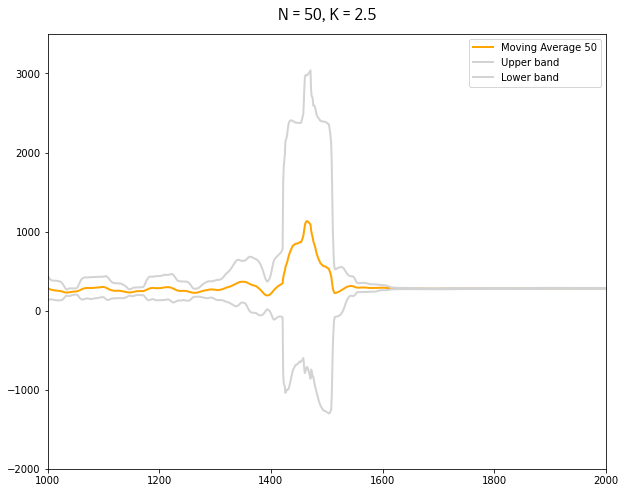

In [336]:
path = '../../../../../usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = fm.FontProperties(fname=path)


plt.figure(figsize=(10, 8))
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['lines.linewidth'] = 0.5

plt.title("N = 50, K = 2.5", pad=15, size=15,  fontproperties=prop)

plt.plot(df.index, df['Mean'], label='Moving Average 50', color = "orange", linewidth=2.0)
plt.plot(df.index, df['Upper'], label='Upper band', color = "lightgray", linewidth=2.0)
plt.plot(df.index, df['Lower'], label='Lower band', color = "lightgray",  linewidth=2.0)

# plt.fill_between(df['Upper'],  df['Lower'], color='lightgray', alpha=0.5)
plt.axis([1000, 2000, -2000, 3500])
plt.legend()

In [281]:
path = '../../../../../usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
prop = fm.FontProperties(fname=path)


plt.figure(figsize=(6,5))
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['lines.linewidth'] = 0.5

plt.title("인공지능 알고리즘에 따른 정확도 결과", pad=15, size=15,  fontproperties=prop)

Acc = ['C1', 'C2', 'C8', 'C9']
index = np.arange(len(Acc))
LSTM = [80.5, 77.8, 79.2, ]
GRU = [81.5, 78.0, 80.1]

bar_width = 0.2
plt.bar(index - 0.12, Int, bar_width, label = 'LSTM', color = "peru")
plt.bar(index + 0.12, Float, bar_width, label = 'GRU', color = "orange")
plt.xticks([0, 1, 2, 3], ['C1', 'C2', 'C8', 'C9'])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylim([60, 100])
plt.xlabel('단위: %', labelpad=7, fontproperties=prop)
plt.legend(['LSTM', 'GRU'])

NameError: name 'fm' is not defined